# KNN = K-nearest neighbor

- Here is my first classification project
- I'm going to use KNN to predict COVID mortality outcome
- I don't suppose to share my database with you and final code is functional.
- I'll share the link of article after publication with you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

## CSV to DataFrame

In [2]:
Data = pd.read_csv ("COVID.csv")
Data.head ()

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14272\320169126.py:1: DtypeWarning: Columns (5,9,12,13,14,15,16,17,18,19,20,24,25,32,33,36,37,41,44,45,48,49,50,52,53,54,56,57,58,59,61,63,64,65,69,74,76,78,79,81,83,84,85,86,87,88,90,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,113,114,116,117,119,120,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,153,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,297,298,299,300,301,305,306,307,308,3

,Patient_Number,Patient_Phase,Patient_Hospital,Patient_AdmitDate,Patient_DischargeDate,Patient_C19Variant,Outcome_InhospitalMortality,Outcome_LOS,Outcome_ICUadmission,Outcome_ICULOS,...,LAB_TotalProtein_First,LAB_TSH_First,LAB_T4_First,LAB_T3_First,LAB_VitD3_First,LAB_Zinc_y_First,LAB_IgM_First,LAB_IgG_First,LAB_SARSCOV2Egene_First,LAB_SARSCOV2RDRP_First
0,1,Phase 2,Hospital1,1400/05/21,NaN,Delta,Died,30.0,1,25,...,NaN,NaN,NaN,NaN,11.2,NaN,NaN,NaN,Positive,Positive CT:28.5
1,2,Phase 2,Hospital1,1400/05/29,NaN,Delta,Died,19.0,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:18.0
2,3,Phase 2,Hospital1,1400/06/17,NaN,Delta,Died,12.0,1,11,...,NaN,NaN,NaN,NaN,39.9,NaN,NaN,NaN,NaN,NaN
3,4,Phase 2,Hospital1,1400/02/04,NaN,NaN,Survived,18.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:20.9
4,5,Phase 2,Hospital1,1400/02/04,NaN,NaN,Survived,18.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:20.9


## make dataframe smaller

In [3]:
list_of_variables = ["Patient_Hospital", "Patient_C19Variant","Outcome_LOS","Outcome_ICUadmission","Demographic_Age","Demographic_Gender", "symtpm_to_referral","Outcome_InhospitalMortality"]
cdf = Data [list_of_variables]

## Let's check target variable

- The purpose of this line is to check if there is any missing value or outliers

In [4]:
cdf ["Outcome_InhospitalMortality"].value_counts ()

Survived    7239
Died        1816
Unknown       79
Name: Outcome_InhospitalMortality, dtype: int64

# Data Cleaning:

## 1) Replace values in a DataFrame (target values)

Here I'm going to replace values of the target variable ("Outcome_InhospitalMortality") as following:
- "Died" = 1
- "Survived" = 0
- "Unknown" = missing data

First you should define a dictionary and specify which value is equivalent to which one
* you will need np.nan to specify missing value
* We have to remove missing values in case of dependant variable

In [5]:
mapping = {'Died': 1, 'Survived': 0, 'Unknown': np.nan}
cdf ["Outcome_InhospitalMortality"] = cdf ["Outcome_InhospitalMortality"].replace(mapping)

# removing of missing values

cdf.dropna(subset=['Outcome_InhospitalMortality'], inplace=True)
print (cdf ["Outcome_InhospitalMortality"].value_counts ())

0.0    7239
1.0    1816
Name: Outcome_InhospitalMortality, dtype: int64


C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14272\2801121916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Outcome_InhospitalMortality"] = cdf ["Outcome_InhospitalMortality"].replace(mapping)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14272\2801121916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset=['Outcome_InhospitalMortality'], inplace=True)


## 2) Cleaning independant variables

- Similarly ...
- You should see what we got then cleaning then transform (or categorization)
- Besides, we need to imput missing values

In [6]:
List_of_categorization = ["Patient_Hospital","Patient_C19Variant","Demographic_Gender"]
print (cdf ["Patient_Hospital"].value_counts ())
print (cdf ["Patient_C19Variant"].value_counts ())
print (cdf ["Demographic_Gender"].value_counts ())

Hospital1    4740
Hospital3    1734
Hospital2    1409
Hospital4    1172
Name: Patient_Hospital, dtype: int64
Delta      1551
Omicron     268
Name: Patient_C19Variant, dtype: int64
Male      4898
Female    4099
1           34
2           23
0            1
Name: Demographic_Gender, dtype: int64


In [7]:
# Patient_Hospital and Patient_C19Variant only need categorization

cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]
cdf ["Patient_C19Variant"] = pd.factorize( cdf ["Patient_C19Variant"])[0]

# Demographic_Gender needs cleaning and categorization:

Gender = {1: "Male", 2 : "Female" , 0 : np.nan}
cdf ["Demographic_Gender"] = cdf ["Demographic_Gender"].replace(mapping)
cdf ["Demographic_Gender"] = pd.factorize( cdf ["Demographic_Gender"])[0]

cdf.head ()

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14272\1348430395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14272\1348430395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Patient_C19Variant"] = pd.factorize( cdf ["Patient_C19Variant"])[0]
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14272\1348430395.py:9: SettingWithCopyWarning: 
A value is trying to

,Patient_Hospital,Patient_C19Variant,Outcome_LOS,Outcome_ICUadmission,Demographic_Age,Demographic_Gender,symtpm_to_referral,Outcome_InhospitalMortality
0,0,0,30.0,1,33.0,0,8.0,1.0
1,0,0,19.0,1,44.0,0,NaN,1.0
2,0,0,12.0,1,50.0,0,7.0,1.0
3,0,-1,18.0,1,71.0,0,7.0,0.0
4,0,-1,18.0,1,71.0,0,7.0,0.0


## Imputation is necessary

- We replaced missing value with mean

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imputaion_list = ["Patient_Hospital", "Patient_C19Variant","Outcome_LOS","Outcome_ICUadmission","Demographic_Age","Demographic_Gender", "symtpm_to_referral"]
imp.fit(cdf [imputaion_list])
cdf [imputaion_list] = imp.transform(cdf[imputaion_list])

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14272\528285098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf [imputaion_list] = imp.transform(cdf[imputaion_list])


In [9]:
x = cdf [["Patient_Hospital", "Patient_C19Variant","Outcome_LOS","Outcome_ICUadmission","Demographic_Age","Demographic_Gender", "symtpm_to_referral"]].values
y = cdf [["Outcome_InhospitalMortality"]]

## Normalizind data

- The porpose of this step is to make different variable distributions comparable for each other
- It is worth mentioning that I tored apart to clean continous values in such a messy database


In [10]:
x = preprocessing.StandardScaler().fit(x).transform (x.astype (float))

## Train/Test splitting

- This time, we are gonna split our data differently

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 4)

## Model training

- As I said before, the KNN or K-nearest neighbors model will be used in this code
- Moreover, I'm going to predict a little bit to describe my model better

In [12]:
from sklearn.neighbors import KNeighborsClassifier
k = 4 
neigh = KNeighborsClassifier (n_neighbors = k).fit (x_train, y_train)
yhat = neigh.predict (x_test)
print (yhat [0:10])
print (y_test [0:10])

[0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
      Outcome_InhospitalMortality
7839                          0.0
476                           0.0
1271                          0.0
6061                          0.0
4910                          0.0
6233                          0.0
7296                          0.0
4846                          0.0
4249                          1.0
2309                          0.0


C:\Users\Hossein Toreyhi\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Model Evaluation

- There are many ways to evaluate a classification model
- We will evaluate our model from simple to complicated methods

## 1) Accuracy score :

In [13]:
from sklearn import metrics
print ("Train set accuracy is : ", metrics.accuracy_score (y_train, neigh.predict (x_train)))
print ("Test set accuracy is : ", metrics.accuracy_score (y_test, yhat))

Train set accuracy is :  0.873964660408614
Test set accuracy is :  0.8144671452236334


## 2) F1-score:

See differences between different types of F1-score calculation


- average=None: The function returns the individual F1 scores for each class, in an array of shape (n_classes,). This is useful when you want to evaluate the performance of the classifier for each class separately.

- average='micro': The function calculates the F1 score globally, by counting the total number of true positives, false negatives, and false positives over all classes, and then computing the F1 score based on those counts. This option treats all classes equally and is suitable when the data is imbalanced.

- average='macro': The function calculates the F1 score for each class and then takes the unweighted mean of the F1 scores. This option treats all classes equally, regardless of their frequency, and is useful when you want to evaluate the overall performance of the classifier across all classes.

- average='weighted': The function calculates the F1 score for each class and then takes the weighted mean of the F1 scores, where the weights are proportional to the number of true instances in each class. This option gives more weight to classes with more samples and is useful when the data is imbalanced.

- average='samples': This option is only applicable when the target values are multilabel and each sample can belong to one or more classes. In this case, the function computes the F1 score for each sample and takes the unweighted mean of the F1 scores over all samples.

- average='binary': This option is only applicable when there are two classes. In this case, the function calculates the F1 score for the positive class and returns it. This option is useful when you're interested in the performance of the classifier on a specific class.

#### In brief : 

####  micro = the f1 score you know
#### None = for each class (doesn't need quote "")
#### macro and wighted for > 2 classes
#### macro = unweighted
#### binary = only the f1-score of positive class (2nd part of "none")

In [14]:
from sklearn.metrics import f1_score

# when average = none : it calculates the results for each class and
print ("F1 score for each one the outcomes are : " , f1_score(y_test, yhat, average= None))
print ("F1 score is : " , f1_score(y_test, yhat, average="micro"))

F1 score for each one the outcomes are :  [0.88925511 0.42857143]
F1 score is :  0.8144671452236334


## 3) Confustion matrix

- there is a simple and ulgy wat and also there is a complex and beatiful way : 

confusion matrix is : [[1349   84]
 [ 252  126]]


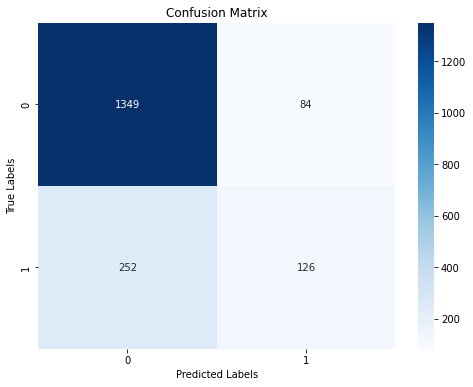

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# plot (?) confusion matrix as numpy array

cm = confusion_matrix(y_test, yhat)
print ("confusion matrix is :", cm)

# plot

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## 4) let's try for other Ks to see which one has higher accuracy:

- which K has better NN ? :))

In [16]:
Ks = 10

# Here I'm gonna define an empty matrix with Ks 0s in order to fullfill it later : 

all_accuracy = np.zeros ((Ks-1))
all_std = np.zeros ((Ks-1))

# (matrix starts from 0 and K starts from 1, that's why we have this much minus 1)

for i in range (1,Ks):
    neigh = KNeighborsClassifier (n_neighbors = i).fit (x_train, y_train)
    yhat = neigh.predict (x_test)
    all_accuracy [i-1] = metrics.accuracy_score (y_test, yhat)
    all_std[i - 1] = np.std(all_accuracy[:i - 1])
   

    
print (all_accuracy)
print (all_std)
print( "The best accuracy was with", all_accuracy.max(), "with k=", all_accuracy.argmax()+1) 

    

C:\Users\Hossein Toreyhi\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Hossein Toreyhi\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Hossein Toreyhi\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Hossein Toreyhi\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Hossein Toreyhi\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_cla

[0.76974047 0.81778023 0.80287134 0.81446715 0.81833241 0.82606295
 0.82330204 0.83600221 0.82882385]
[       nan 0.         0.02401988 0.02007693 0.01899615 0.01831844
 0.01853078 0.0179507  0.01881054]
The best accuracy was with 0.8360022087244616 with k= 8


## Draw a plot

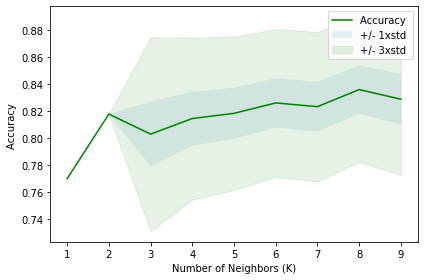

In [17]:
plt.plot(range(1,Ks),all_accuracy,'g')
plt.fill_between(range(1,Ks),all_accuracy - 1 * all_std,all_accuracy + 1 * all_std, alpha=0.10)
plt.fill_between(range(1,Ks),all_accuracy - 3 * all_std, all_accuracy + 3 * all_std, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()